In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv('telecom_churn_data.csv')

In [5]:
#data.describe()

In [6]:
#data.columns

In [7]:
print(data.shape)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
# data.isnull().sum().sort_values()/data.shape[0]*100 > 73
data.head(5)
data.filter(like='total_rech_data').head()

(99999, 226)


,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9
0,1.0,1.0,1.0,NaN
1,NaN,1.0,2.0,NaN
2,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN


In [8]:
#data.mobile_number.unique().size

In [9]:
#sample = data.head()
#months_data = sample.filter(like='rech')
#months_data

In [10]:
data['average_recharge']=(data.total_rech_amt_6+data.total_rech_amt_7)/2

In [11]:
data.average_recharge.describe(percentiles=[0.7,0.9,0.99,0.999,0.999999])

count       99999.000000
mean          325.238792
std           370.833466
min             0.000000
50%           229.000000
70%           368.500000
90%           698.000000
99%          1590.000000
99.9%        3037.514000
99.9999%    35861.288025
max         37762.500000
Name: average_recharge, dtype: float64

In [12]:
max_revenue_customers_data = data[data.average_recharge >368.5]

In [13]:
missing_columns = data.columns[100*(data.isnull().sum()/len(data.index)) > 60]

In [14]:
missing_columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [15]:
churn_data_jun = data.filter(regex='(_6$|^jun_)')
churn_data_jul = data.filter(regex='(_7$|^jul_)')
churn_data_aug = data.filter(regex='(_8$|^aug_)')
churn_data_sep = data.filter(regex='(_9$|^sep_)') 

In [16]:
churn_data_jun.columns.shape, churn_data_jul.columns.shape, churn_data_aug.columns.shape, churn_data_sep.columns.shape 

((55,), (55,), (55,), (55,))

In [17]:
churn_data_jun.columns

Index(['last_date_of_month_6', 'arpu_6', 'onnet_mou_6', 'offnet_mou_6',
       'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6',
       'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6',
       'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6',
       'max_rech_amt_6', 'date_of_last_rech_6', 'last_day_rch_amt_6',
       'date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6',
       'night_pck_user

In [18]:
churn_data_jun.head(10)

,last_date_of_month_6,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,...,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6,jun_vbc_3g
0,6/30/2014,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.57,212.17,212.17,0.0,0,0,1,0,1.0,101.20
1,6/30/2014,34.047,24.11,15.74,0.00,0.00,23.88,11.51,0.00,0.00,...,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
2,6/30/2014,167.690,11.54,143.33,0.00,0.00,7.19,29.34,24.11,0.00,...,0.00,NaN,NaN,NaN,0,0,0,0,NaN,4.17
3,6/30/2014,221.338,99.91,123.31,0.00,0.00,73.68,107.43,1.91,0.00,...,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
4,6/30/2014,261.636,50.31,76.96,0.00,0.00,50.31,67.64,0.00,0.00,...,0.00,0.00,0.00,0.0,0,1,0,0,0.0,0.00
5,6/30/2014,50.258,50.16,19.28,0.00,0.00,50.16,16.39,0.00,0.00,...,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
6,6/30/2014,429.023,71.03,262.73,0.00,0.00,71.03,252.23,10.38,0.11,...,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
7,6/30/2014,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.00,...,0.00,NaN,NaN,NaN,0,0,0,0,NaN,18.74
8,6/30/2014,378.721,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.00,...,0.00,NaN,NaN,NaN,0,0,0,0,NaN,122.16
9,6/30/2014,119.518,33.89,63.48,0.00,0.00,33.89,38.03,0.00,0.00,...,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00


In [19]:
data['total_rech_data_6'] = data['total_rech_data_6'].replace(np.nan, 0)
data['total_rech_data_7'] = data['total_rech_data_7'].replace(np.nan, 0)
data['total_rech_data_8'] = data['total_rech_data_8'].replace(np.nan, 0)
data['total_rech_data_9'] = data['total_rech_data_9'].replace(np.nan, 0)
data['av_rech_amt_data_6'] = data['av_rech_amt_data_6'].replace(np.nan, 0)
data['av_rech_amt_data_7'] = data['av_rech_amt_data_7'].replace(np.nan, 0)
data['av_rech_amt_data_8'] = data['av_rech_amt_data_8'].replace(np.nan, 0)
data['av_rech_amt_data_9'] = data['av_rech_amt_data_9'].replace(np.nan, 0)

In [20]:
data['max_rech_data_6'] = data['date_of_last_rech_data_6'].apply(lambda x: 0 if x == np.nan else 1)
data['max_rech_data_7'] = data['date_of_last_rech_data_7'].apply(lambda x: 0 if x == np.nan else 1)
data['max_rech_data_8'] = data['date_of_last_rech_data_8'].apply(lambda x: 0 if x == np.nan else 1)
data['max_rech_data_9'] = data['date_of_last_rech_data_9'].apply(lambda x: 0 if x == np.nan else 1)

In [21]:
data['night_pck_user_6'] = data['night_pck_user_6'].replace(np.nan, -1)
data['night_pck_user_7'] = data['night_pck_user_7'].replace(np.nan, -1)
data['night_pck_user_8'] = data['night_pck_user_8'].replace(np.nan, -1)
data['night_pck_user_9'] = data['night_pck_user_9'].replace(np.nan, -1)
data['fb_user_6'] = data['fb_user_6'].replace(np.nan, -1)
data['fb_user_7'] = data['fb_user_7'].replace(np.nan, -1)
data['fb_user_8'] = data['fb_user_8'].replace(np.nan, -1)
data['fb_user_9'] = data['fb_user_9'].replace(np.nan, -1)

In [22]:
data['count_rech_2g_6'] = data['date_of_last_rech_data_6'].apply(lambda x: 0 if x == np.nan else 1)
data['count_rech_3g_6'] = data['date_of_last_rech_data_6'].apply(lambda x: 0 if x == np.nan else 1)
data['count_rech_2g_7'] = data['date_of_last_rech_data_7'].apply(lambda x: 0 if x == np.nan else 1)
data['count_rech_3g_7'] = data['date_of_last_rech_data_7'].apply(lambda x: 0 if x == np.nan else 1)
data['count_rech_2g_8'] = data['date_of_last_rech_data_8'].apply(lambda x: 0 if x == np.nan else 1)
data['count_rech_3g_8'] = data['date_of_last_rech_data_8'].apply(lambda x: 0 if x == np.nan else 1)
data['count_rech_2g_9'] = data['date_of_last_rech_data_9'].apply(lambda x: 0 if x == np.nan else 1)
data['count_rech_3g_9'] = data['date_of_last_rech_data_9'].apply(lambda x: 0 if x == np.nan else 1)

In [23]:
round(data.isnull().sum()/len(data.index), 2)*100

mobile_number           0.0
circle_id               0.0
loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_6    0.0
last_date_of_month_7    1.0
last_date_of_month_8    1.0
last_date_of_month_9    2.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             4.0
onnet_mou_7             4.0
onnet_mou_8             5.0
onnet_mou_9             8.0
offnet_mou_6            4.0
offnet_mou_7            4.0
offnet_mou_8            5.0
offnet_mou_9            8.0
roam_ic_mou_6           4.0
roam_ic_mou_7           4.0
roam_ic_mou_8           5.0
roam_ic_mou_9           8.0
roam_og_mou_6           4.0
roam_og_mou_7           4.0
roam_og_mou_8           5.0
roam_og_mou_9           8.0
loc_og_t2t_mou_6        4.0
                       ... 
night_pck_user_6        0.0
night_pck_user_7        0.0
night_pck_user_8        0.0
night_pck_user_9        0.0
monthly_2g_6        

In [24]:
missing_row_percentage = 100 * data.T.isnull().sum().sort_values(ascending=False) / data.shape[1]
missing_row_percentage[missing_row_percentage > 50].shape

(1018,)

In [25]:
missing_columns = data.columns[100*(data.isnull().sum()/len(data.index)) > 60]
data = data.drop(missing_columns,axis=1)

In [26]:
round(data.isnull().sum().sort_values(ascending=False)/len(data.index), 2)*100

og_others_9           8.0
std_ic_t2o_mou_9      8.0
isd_og_mou_9          8.0
ic_others_9           8.0
std_og_mou_9          8.0
roam_og_mou_9         8.0
isd_ic_mou_9          8.0
spl_ic_mou_9          8.0
roam_ic_mou_9         8.0
loc_og_mou_9          8.0
loc_og_t2m_mou_9      8.0
spl_og_mou_9          8.0
offnet_mou_9          8.0
std_ic_mou_9          8.0
std_og_t2c_mou_9      8.0
onnet_mou_9           8.0
loc_ic_t2f_mou_9      8.0
loc_ic_mou_9          8.0
std_og_t2t_mou_9      8.0
loc_og_t2c_mou_9      8.0
loc_ic_t2t_mou_9      8.0
loc_ic_t2m_mou_9      8.0
std_og_t2m_mou_9      8.0
loc_og_t2t_mou_9      8.0
loc_og_t2f_mou_9      8.0
std_ic_t2t_mou_9      8.0
std_ic_t2m_mou_9      8.0
std_og_t2f_mou_9      8.0
std_ic_t2f_mou_9      8.0
std_og_t2f_mou_8      5.0
                     ... 
total_rech_num_8      0.0
total_rech_num_7      0.0
total_rech_num_6      0.0
total_ic_mou_9        0.0
total_ic_mou_8        0.0
total_ic_mou_7        0.0
total_ic_mou_6        0.0
sep_vbc_3g  

In [27]:
data.drop(['mobile_number','circle_id'],axis=1,inplace=True)
data = data[data.columns.drop(list(data.filter(regex='date')))]

In [28]:
data.shape

(99999, 205)

In [29]:
data = data.fillna(data.median()).dropna(axis=1, how='all')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 205 entries, loc_og_t2o_mou to average_recharge
dtypes: float64(160), int64(45)
memory usage: 156.4 MB


In [31]:
round(data.isnull().sum().sort_values(ascending=False)/len(data.index), 2)*100

average_recharge      0.0
isd_og_mou_6          0.0
og_others_8           0.0
og_others_7           0.0
og_others_6           0.0
spl_og_mou_9          0.0
spl_og_mou_8          0.0
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_9          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
std_og_mou_9          0.0
total_og_mou_6        0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2c_mou_9      0.0
std_og_t2c_mou_8      0.0
std_og_t2c_mou_7      0.0
std_og_t2c_mou_6      0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
og_others_9           0.0
total_og_mou_7        0.0
std_ic_t2m_mou_8      0.0
loc_ic_t2f_mou_8      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2t_mou_9      0.0
                     ... 
std_ic_t2o_mou_6      0.0
std_ic_t2f_mou_9      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_7      0.0
isd_ic_mou_9          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8 

In [32]:
data['t2t_total_6']=data['loc_og_t2t_mou_6']+data['std_og_t2t_mou_6']+data['loc_ic_t2t_mou_6']+data['std_ic_t2t_mou_6']
data['t2t_total_7']=data['loc_og_t2t_mou_7']+data['std_og_t2t_mou_7']+data['loc_ic_t2t_mou_7']+data['std_ic_t2t_mou_7']
data['t2t_total_8']=data['loc_og_t2t_mou_8']+data['std_og_t2t_mou_8']+data['loc_ic_t2t_mou_8']+data['std_ic_t2t_mou_8']
data['t2t_total_9']=data['loc_og_t2t_mou_9']+data['std_og_t2t_mou_9']+data['loc_ic_t2t_mou_9']+data['std_ic_t2t_mou_9']

data['t2m_total_6']=data['loc_og_t2m_mou_6']+data['std_og_t2m_mou_6']+data['loc_ic_t2m_mou_6']+data['std_ic_t2m_mou_6']
data['t2m_total_7']=data['loc_og_t2m_mou_7']+data['std_og_t2m_mou_7']+data['loc_ic_t2m_mou_7']+data['std_ic_t2m_mou_7']
data['t2m_total_8']=data['loc_og_t2m_mou_8']+data['std_og_t2m_mou_8']+data['loc_ic_t2m_mou_8']+data['std_ic_t2m_mou_8']
data['t2m_total_9']=data['loc_og_t2m_mou_9']+data['std_og_t2m_mou_9']+data['loc_ic_t2m_mou_9']+data['std_ic_t2m_mou_9']

data['t2f_total_6']=data['loc_og_t2f_mou_6']+data['std_og_t2f_mou_6']+data['loc_ic_t2f_mou_6']+data['std_ic_t2f_mou_6']
data['t2f_total_7']=data['loc_og_t2f_mou_7']+data['std_og_t2f_mou_7']+data['loc_ic_t2f_mou_7']+data['std_ic_t2f_mou_7']
data['t2f_total_8']=data['loc_og_t2f_mou_8']+data['std_og_t2f_mou_8']+data['loc_ic_t2f_mou_8']+data['std_ic_t2f_mou_8']
data['t2f_total_9']=data['loc_og_t2f_mou_9']+data['std_og_t2f_mou_9']+data['loc_ic_t2f_mou_9']+data['std_ic_t2f_mou_9']

data['t2c_total_6']=data['loc_og_t2c_mou_6']+data['std_og_t2c_mou_6']
data['t2c_total_7']=data['loc_og_t2c_mou_7']+data['std_og_t2c_mou_7']
data['t2c_total_8']=data['loc_og_t2c_mou_8']+data['std_og_t2c_mou_8']
data['t2c_total_9']=data['loc_og_t2c_mou_9']+data['std_og_t2c_mou_9']


In [33]:
'''
data['cust_care_calls_6']=data['t2c_total_6']/data['total_og_mou_6'].apply(lambda x: 0 if x == np.nan else x)
data['cust_care_calls_7']=data['t2c_total_7']/data['total_og_mou_7'].apply(lambda x: 0 if x == np.nan else x)
data['cust_care_calls_8']=data['t2c_total_8']/data['total_og_mou_8'].apply(lambda x: 0 if x == np.nan else x)
data['cust_care_calls_9']=data['t2c_total_9']/data['total_og_mou_9'].apply(lambda x: 0 if x == np.nan else x)
'''
data['total_vol_6']=data['vol_2g_mb_6']+data['vol_3g_mb_6']
data['total_vol_7']=data['vol_2g_mb_7']+data['vol_3g_mb_7']
data['total_vol_8']=data['vol_2g_mb_8']+data['vol_3g_mb_8']
data['total_vol_9']=data['vol_2g_mb_9']+data['vol_3g_mb_9']

In [34]:
data['total_og_mou_diff_7_6'] = data.total_og_mou_7 - data.total_og_mou_6
data['total_og_mou_diff_8_7'] = data.total_og_mou_8 - data.total_og_mou_7
data['total_ic_mou_diff_7_6'] = data.total_ic_mou_7 - data.total_ic_mou_6
data['total_ic_mou_diff_8_7'] = data.total_ic_mou_8 - data.total_ic_mou_7
data['total_rech_num_diff_7_6'] = data.total_rech_num_7 - data.total_rech_num_6
data['total_rech_num_diff_8_7'] = data.total_rech_num_8 - data.total_rech_num_7
data['total_rech_amt_diff_7_6'] = data.total_rech_amt_7 - data.total_rech_amt_6
data['total_rech_amt_diff_8_7'] = data.total_rech_amt_8 - data.total_rech_amt_7

In [35]:
data.average_recharge.describe(percentiles=[0.7,0.9,0.99,0.999,0.999999])

count       99999.000000
mean          325.238792
std           370.833466
min             0.000000
50%           229.000000
70%           368.500000
90%           698.000000
99%          1590.000000
99.9%        3037.514000
99.9999%    35861.288025
max         37762.500000
Name: average_recharge, dtype: float64

In [36]:
data = data[data.average_recharge > 368.5]

In [37]:
data['churn'] = np.where((data['total_ic_mou_9'] + data['total_og_mou_9']+data['total_vol_9']) == 0, 1, 0)

In [38]:
data = data[data.columns.drop(list(data.filter(like='_9')))]

In [39]:
round(data.isnull().sum().sort_values(ascending=False)/len(data.index), 2)*100

churn                      0.0
loc_ic_t2f_mou_6           0.0
loc_ic_t2m_mou_7           0.0
loc_ic_t2m_mou_6           0.0
loc_ic_t2t_mou_8           0.0
loc_ic_t2t_mou_7           0.0
loc_ic_t2t_mou_6           0.0
total_og_mou_8             0.0
total_og_mou_7             0.0
total_og_mou_6             0.0
og_others_8                0.0
og_others_7                0.0
og_others_6                0.0
spl_og_mou_8               0.0
spl_og_mou_7               0.0
spl_og_mou_6               0.0
isd_og_mou_8               0.0
isd_og_mou_7               0.0
isd_og_mou_6               0.0
std_og_mou_8               0.0
std_og_mou_7               0.0
loc_ic_t2m_mou_8           0.0
loc_ic_t2f_mou_7           0.0
total_rech_amt_diff_8_7    0.0
loc_ic_t2f_mou_8           0.0
total_ic_mou_6             0.0
std_ic_mou_8               0.0
std_ic_mou_7               0.0
std_ic_mou_6               0.0
std_ic_t2o_mou_8           0.0
                          ... 
ic_others_8                0.0
ic_other

In [40]:
data.shape

(29979, 180)

In [41]:
pd.set_option('display.max_rows', None)
data.nunique(axis=0).sort_values(ascending=True)

loc_og_t2o_mou                 1
std_og_t2c_mou_8               1
std_ic_t2o_mou_6               1
std_ic_t2o_mou_7               1
std_ic_t2o_mou_8               1
max_rech_data_6                1
max_rech_data_7                1
max_rech_data_8                1
count_rech_2g_6                1
count_rech_2g_7                1
count_rech_2g_8                1
count_rech_3g_6                1
count_rech_3g_7                1
count_rech_3g_8                1
loc_ic_t2o_mou                 1
std_og_t2o_mou                 1
std_og_t2c_mou_7               1
std_og_t2c_mou_6               1
churn                          2
night_pck_user_6               3
fb_user_6                      3
fb_user_7                      3
fb_user_8                      3
night_pck_user_7               3
night_pck_user_8               3
monthly_2g_6                   5
monthly_2g_7                   6
monthly_2g_8                   6
monthly_3g_6                  12
monthly_3g_8                  12
monthly_3g

In [42]:
'''
fb_user_8                      3
fb_user_7                      3
fb_user_6                      3
night_pck_user_6               3
night_pck_user_7               3
night_pck_user_8               3
monthly_2g_6                   5
monthly_2g_8                   6
monthly_2g_7                   6
monthly_3g_8                  12
monthly_3g_6                  12
monthly_3g_7                  15
sachet_3g_6                   25
sachet_3g_7                   27
sachet_3g_8                   29
sachet_2g_6                   30
sachet_2g_8                   34
sachet_2g_7                   34
'''

'\nfb_user_8                      3\nfb_user_7                      3\nfb_user_6                      3\nnight_pck_user_6               3\nnight_pck_user_7               3\nnight_pck_user_8               3\nmonthly_2g_6                   5\nmonthly_2g_8                   6\nmonthly_2g_7                   6\nmonthly_3g_8                  12\nmonthly_3g_6                  12\nmonthly_3g_7                  15\nsachet_3g_6                   25\nsachet_3g_7                   27\nsachet_3g_8                   29\nsachet_2g_6                   30\nsachet_2g_8                   34\nsachet_2g_7                   34\n'

In [43]:
data[data.churn == 1].shape

(2589, 180)

In [44]:
data[data.churn == 1].groupby('sachet_3g_6').size()

sachet_3g_6
0     2450
1       87
2       16
3        8
4       11
5        1
6        3
7        4
8        1
9        2
10       4
19       1
23       1
dtype: int64

In [45]:
#data[(data.sachet_3g_8 == 0) & (data.churn == 1)].shape

In [46]:
categorical_variables = ['fb_user_8','fb_user_7','fb_user_6','night_pck_user_6','night_pck_user_7','night_pck_user_8','monthly_2g_6','monthly_2g_8','monthly_2g_7','monthly_3g_8','monthly_3g_6','monthly_3g_7','sachet_3g_6','sachet_3g_7','sachet_3g_8','sachet_2g_6','sachet_2g_8','sachet_2g_7']

In [47]:
data_cleaned = data.copy()
predicted_val = 'churn'
for cat_var in categorical_variables:
    churn_rate_replace_dict = data_cleaned[[cat_var, predicted_val]].groupby(cat_var).mean().to_dict()[predicted_val]
    data[cat_var] =  data[cat_var].replace(churn_rate_replace_dict)

In [48]:
continuous_variables = list(data.columns)

In [49]:
decision_tree_data = data


In [50]:
continuous_variables.remove('churn')
continuous_data = data[continuous_variables]

In [51]:
churn_frame = data['churn']
data = data.drop(['churn'],axis =1)

In [52]:
cols = list(continuous_data)
nunique = continuous_data.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
continuous_data = continuous_data.drop(cols_to_drop, axis=1)

In [53]:
normalized_df=(continuous_data-continuous_data.mean())/continuous_data.std()
data = data.drop(continuous_variables, 1)
data = pd.concat([data,normalized_df,churn_frame],axis=1)
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_vol_8,total_og_mou_diff_7_6,total_og_mou_diff_8_7,total_ic_mou_diff_7_6,total_ic_mou_diff_8_7,total_rech_num_diff_7_6,total_rech_num_diff_8_7,total_rech_amt_diff_7_6,total_rech_amt_diff_8_7,churn
7,1.087487,1.642213,5.353688,-0.518226,-0.519414,-0.464458,0.072955,0.292454,-0.109602,-0.015129,...,-0.373032,0.175228,-0.352865,-0.317353,-0.490409,0.026574,0.550929,-1.551546,6.432731,1
8,-0.471643,-0.209917,-0.807610,0.254149,0.095712,-0.501373,-0.690428,-0.708661,-0.507850,-0.220071,...,-0.359873,-0.175079,-0.354938,-0.346470,0.033632,0.280818,-0.793487,0.325446,-0.874994,0
13,-0.213937,-0.828754,0.118169,0.445305,-0.407930,0.569319,-0.012411,-0.629132,0.219522,0.077052,...,-0.373010,-1.301479,1.845597,-3.365655,4.427358,-0.227669,1.297827,-0.496968,1.199443,0
16,-0.353648,-0.625324,-0.704996,-0.534135,-0.479291,-0.425162,-0.261404,-0.401842,-0.452600,-0.220071,...,-0.373032,-0.147007,0.066637,0.039255,-0.301959,-0.481913,-0.345348,-0.434008,-0.231809,0
17,0.231276,-1.231931,-1.034767,1.930257,-0.613650,-0.559910,-0.760687,-0.874570,-0.783132,-0.220071,...,-0.373032,-2.244364,0.171935,-0.405960,0.076681,-2.134498,0.550929,-1.602701,0.246739,0


In [54]:
type(data)

pandas.core.frame.DataFrame

In [55]:
from sklearn.utils import resample
data_majority = data[data.churn==0]
data_minority = data[data.churn==1]

df_minority_upsampled = resample(data_minority, replace=True, n_samples=data[data.churn == 0].shape[0], random_state=123)
data = pd.concat([df_minority_upsampled, data_majority])
data = data.sample(frac=1).reset_index(drop=True)

In [56]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['churn'],axis=1)

# Putting response variable to y
y = data['churn']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [57]:
X_train.shape,X_test.shape

((38346, 161), (16434, 161))

In [58]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [59]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Series([], dtype: float64)

In [60]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [61]:
pca.components_

array([[ 7.99927622e-02,  1.28422110e-01,  1.37604241e-01, ...,
         3.94488714e-02,  5.17101716e-02,  2.62079618e-02],
       [ 1.10897746e-01,  1.16028519e-01,  5.53838221e-02, ...,
        -6.92599640e-02,  7.42577011e-03, -6.69437114e-02],
       [-4.16279995e-02, -1.08513443e-01, -1.11485595e-01, ...,
        -9.05181397e-03, -7.85722367e-02, -5.24209328e-03],
       ...,
       [ 0.00000000e+00,  6.00716518e-18,  2.46318449e-16, ...,
        -2.15590020e-02, -1.36446505e-02,  8.62646945e-03],
       [-0.00000000e+00,  4.68372410e-17, -2.50996546e-17, ...,
        -7.03943848e-13, -3.19556881e-13,  1.19841637e-13],
       [-0.00000000e+00,  1.73849684e-17,  4.54085026e-17, ...,
        -2.78156838e-13,  8.48626724e-15,  1.51725854e-13]])

In [62]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC2
0,arpu_6,0.079993,0.110898
1,arpu_7,0.128422,0.116029
2,arpu_8,0.137604,0.055384
3,onnet_mou_6,-0.035943,0.173189
4,onnet_mou_7,-0.000703,0.168576


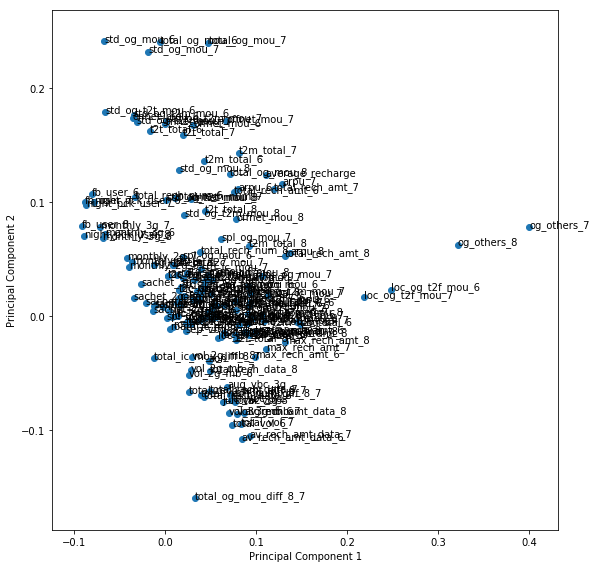

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

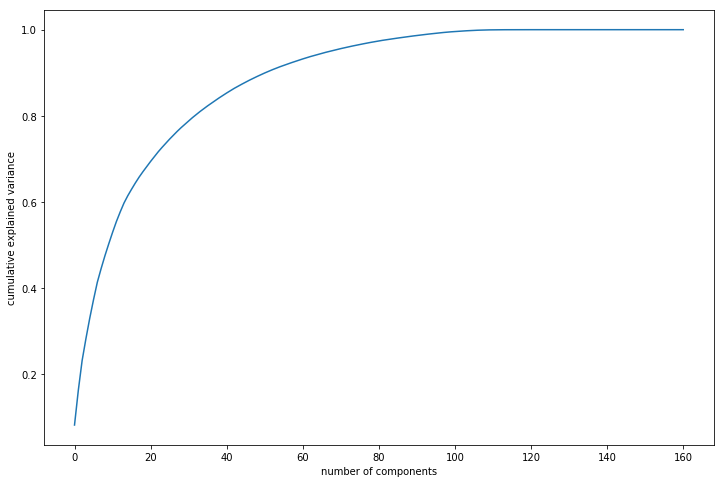

In [64]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [65]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [66]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(38346, 50)

In [67]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

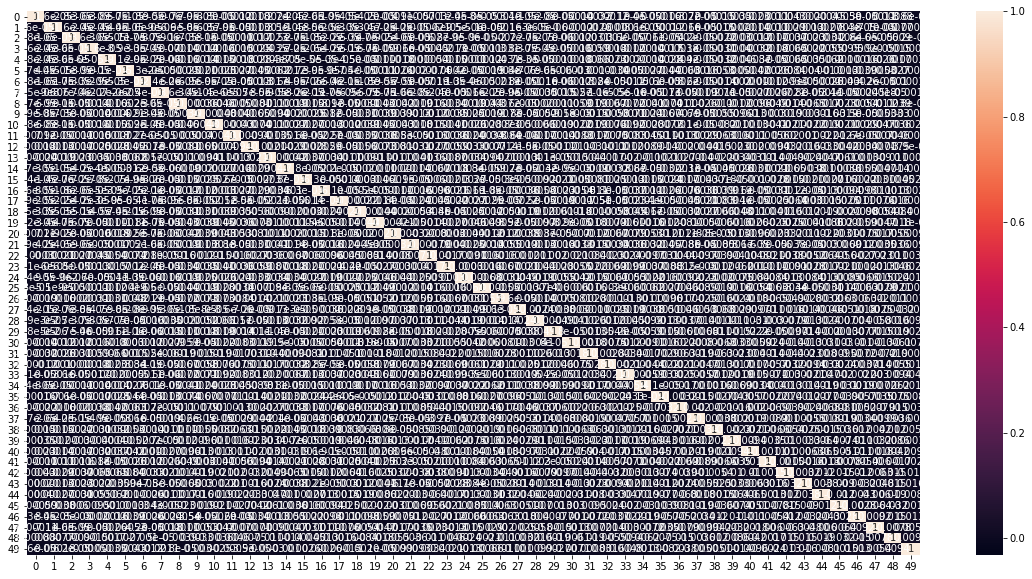

In [68]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [69]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.018815811591368473 , min corr:  -0.03202205759376866


In [70]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(16434, 50)

In [71]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [72]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [73]:
pca_again = PCA(0.90)

In [74]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(38346, 52)

In [75]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [76]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(16434, 52)

In [77]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.89'

In [ ]:

# Putting feature variable to X
X = decision_tree_data.drop(['churn'],axis=1)

# Putting response variable to y
y = decision_tree_data['churn']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

In [ ]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

In [ ]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot, graphviz

# Putting features
features = list(decision_tree_data.columns[:-1])
features

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

In [ ]:
# accuracy score
clf_gini.score(X_test,y_test)

In [ ]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [ ]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [ ]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))